# Task 1 (5% credit) 
Provide a definition for the concept of a conjugate prior given the Bayesian learning model. What is the conjugate prior for the univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a fixed $\sigma$?

## Answer
In Bayesian probability theory, if the posterior distributions p(θ|x) are in the same family as the prior probability distribution p(θ), the prior and posterior are then called conjugate distributions, and the prior is called a conjugate prior for the likelihood function.

$w\sim {\cal N}(w^*,\sigma^*)$ 


# Task 2 (5% credit). 
Which prior in the Bayesian linear regression framework leads to: a) Ridge regression, b) Lasso regression?

## Answer

An important particular case of all the components of $w$ having the same prior $w_j\sim{\cal N}(0,\sigma/\sqrt{\lambda})$ leads to

$$
\hat{w}=argmin_w\left[RSS(w)+\lambda||w||_2^2\right]\hspace{5ex}
$$

where $||w||_2=\sqrt{\sum\limits_j w_j^2}$, known as Ridge regression.

An alternative choice of the Laplacian prior distribution $p(w_j)\sim e^{-\lambda|w_j|/\sigma}$ leads to  
$$
\hat{w}=argmin_w\left[RSS(w)+\lambda||w||_1\right],\hspace{5ex}
$$
where $||w||_1=\sum\limits_j |w_j|$, known as Lasso (least absolute shrinkage and selection operator) regression.

# Task 3 (10% credit). 
Answer some questions about the properties of Lasso/Ridge:

a) Which of the Lasso and Ridge regressions possess an analytic solution in the closed form?

b) Which of the Lasso and Ridge regressions often use to completely eliminate coefficients for some of the regressors?

c) Which value of $\lambda$ makes Lasso and Ridge identical to the ordinary least square regression?

d) What dataset (training, validation or test) you would use to estimate the $\lambda$ for Lasso or Ridge?

## Answer

a) Ridge regressions

b) Lasso regressions

c) When  $\lambda$ = 0

d) Validation data

# Task 4 (15% credit). 
Consider a Bayesian univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a given $\sigma=1$ and the prior $w\sim {\cal N}(5,1)$. Compute the posterior distribution after an observation $y=12,x=2$. After all, what is the probability of having $w<5$?

## Answer

$$
p(w|Y, X)\sim e^{-w^2 \frac{\sum_i x_i^2(\sigma^*)^2+\sigma^2}{2\sigma^2(\sigma^*)^2}+w \frac{(\sigma^*)^2 \sum_i y_i x_i+\sigma^2 w^*}{2\sigma^2(\sigma^*)^2}}\sim e^{\frac{\left(w-\frac{ \sigma^{-2} \sum_i y_i x_i +(\sigma^*)^{-2} w^*}{\left(\sum_i x_i^2\sigma^{-2}+(\sigma^*)^{-2}\right)}\right)^2}{\frac{2}{(\sigma^*)^{-2}+\sum_i x_i^2\sigma^{-2}}}}\sim
$$

$$
\sim {\cal N}\left(\frac{ \sigma^{-2} \sum_i y_i x_i +(\sigma^*)^{-2} w^*}{\left(\sum_i x_i^2\sigma^{-2}+(\sigma^*)^{-2}\right)},
\frac{1}{\sqrt{(\sigma^*)^{-2}+\sum_i x_i^2\sigma^{-2}}}\right)
$$

$$
\sim {\cal N}(29/5,1/\sqrt{5})
$$


In [2]:
import scipy.stats
a = scipy.stats.norm(5.8,0.4472).cdf(5)
print "The probability of having w <5 is", a

The probability of having w <5 is 0.0368147549388


# Task 5 (20% credit). 
For the training and test sets provided below, train a linear regression of $y$ (last column) vs the rest of the columns of the table treated as regressors (intercept excluded) over the training set, apply it to the test set and report it's R2 performance over both - training and test set.

In [13]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.io.data as web
import Quandl
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pymc3 as pm
from numpy import random
import random as rnd
from scipy import stats
from pandas.stats.api import ols
import pylab
from sklearn import linear_model
plt.rcParams["figure.figsize"]=(10.0,8.0)
import pandas as pd


data_train=pd.read_csv("Homework1_training.csv")
data_test=pd.read_csv("Homework1_test.csv")

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [14]:
# In the sample. (Only use training set)
y_train=np.asarray(data_train.iloc[:,-1]) # make dependent variable
X_train=np.asarray(data_train.iloc[:,1:-1]) #make independent variables

result=ols(y=y_train,x=pd.DataFrame(X_train))
R_2_IS=result.r2  # get R2

#Out of sample 
y_test=np.asarray(data_test.iloc[:,-1]) # make dependent variable
X_test=np.asarray(data_test.iloc[:,1:-1]) #make independent variables

a=np.array(X_test)  #makes sure conver pd data to np array
b=np.array(result.beta) #makes sure conver pd data to np array

print('OLS regression coefficients={0}'.format(b))
c=np.sum(a*b[0:-1],axis=1)+b[-1] #b is estimated coefficients, a is prediction data, b[-1] is intercept. This is for predicted y
error=y_test-c # y_predict is real value, c is the value we guessed
R_2_OS=1-error.var()/y_test.var() # this is out of sample R2

print("The R-squared we found for in-sample (IS) OLS is: {0}".format(R_2_IS))
print("The R-squared we found for out-of-sample (OS) OLS is: {0}".format(R_2_OS))

OLS regression coefficients=[  1.82388841e+10   4.42008105e+09   5.45534653e+09   1.93765326e+10
  -9.42109928e+10   5.81451981e+10   4.61986926e+10   6.63398809e+10
  -8.31135880e+10   1.07345196e+11  -8.68308443e+10  -2.43362141e+10
   4.63607688e+10  -1.68098998e+10  -7.56879145e+10  -2.84901407e+10
   7.56196833e+08   5.10018356e+10   2.98505792e+10   8.37203390e+10
  -3.59251768e+10  -1.22547880e-01  -2.12567176e-01   8.06436224e-02
   6.67765490e-02   1.54470347e-01  -3.62438319e-01  -4.39189555e-01
  -3.15066655e-02   1.61247924e-01  -1.46697289e-01  -3.71505917e-02
   6.23953761e-02  -1.80129304e-01   5.80177538e-04  -3.10143127e-01
   5.12672304e-02  -1.24868511e-01   2.54563504e-01   2.14801869e-03
  -3.52915527e+09]
The R-squared we found for in-sample (IS) OLS is: 0.999999951338
The R-squared we found for out-of-sample (OS) OLS is: -2.4010443973


# Task 6 (20% credit). 
Train Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=40000$ and $\lambda_{Lasso}=40$ and report their performance over the test set.

In [21]:
#For Ridge
Ridge=linear_model.Ridge(fit_intercept=True,alpha=40000) #try Ridge with an arbitrary regularization parameter lambda=1

Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

#Out of sample
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for IS Ridge is: 0.853278042856
The R-squared we found for OS Ridge is: 0.656284514237


In [22]:
#For Lasso
Lasso=linear_model.Lasso(fit_intercept=True,alpha=40) #try Ridge with a selected regularization parameter lambda

Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Ridge))
    
#Out of sample
p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Lasso is: 0.853278042856
The R-squared we found for OS Lasso is: 0.651017455205


# Task 7 (25% credit). 
For each $m=1,2,...39$ train OLS, Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=40000$ and $\lambda_{Lasso}=40$ using the first $m$ columns of the data tables as the regressors and plot the in-sample (training) and out-of-sample (test) R2 for all three models on the same graph.

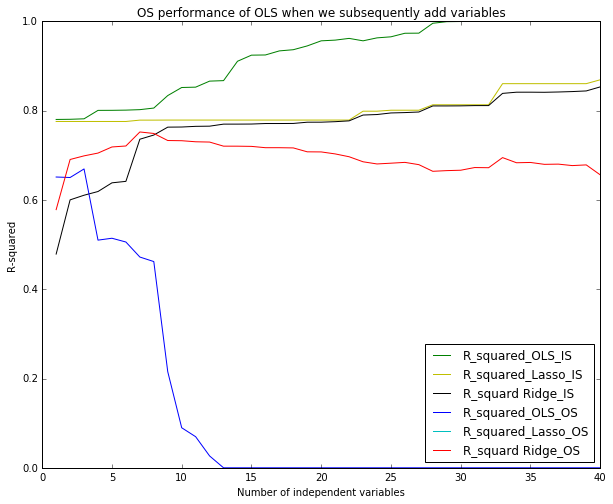

In [25]:
#OS OLS R2 deneding on the number of variables t

Number_variables=[]

OLS_R_2_OS_F=[]
OLS_R_2_IS_F=[]
OLS_R_2_Ridge_OS_F=[]
OLS_R_2_Ridge_IS_F=[]
OLS_R_2_Lasso_OS_F=[]
OLS_R_2_Lasso_IS_F=[]

t=0

##########################################################################################################
##########################################################################################################

for j in range(len(X_train.T)): #subsequently add variables
    
    t+=1
    Number_variables.append(t)

    #For OLS

    result=ols(y=y_train,x=pd.DataFrame(X_train[:,0:j+1]))
    temp=X_test[:,0:j+1]

    a=np.array(temp)
    b=np.array(result.beta)
    c=np.sum(a*b[0:-1],axis=1)+b[-1]

    error=y_test-c
    R_2_OS_OLS=1-error.var()/y_test.var()
    if R_2_OS_OLS>0:
        OLS_R_2_OS_F.append(R_2_OS_OLS)
    else:
        OLS_R_2_OS_F.append(0)
    
    R_2_IS_OLS=result.r2
    OLS_R_2_IS_F.append(R_2_IS_OLS)
    
    
    #For Ridge

    
    Ridge=linear_model.Ridge(fit_intercept=True,alpha=40000)
    Ridge.fit(X_train[:,0:j+1],y_train)
    
    # In the sample:
    p_IS=Ridge.predict(X_train[:,0:j+1])
    err_IS=p_IS-y_train
    R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Ridge_IS_F.append(R_2_IS_Ridge)
    
    #Out of sample
    p_OS=Ridge.predict(X_test[:,0:j+1])
    err_OS=p_OS-y_test
    R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
    
    if R_2_OS_Ridge>0:
        OLS_R_2_Ridge_OS_F.append(R_2_OS_Ridge)
    else:
        OLS_R_2_Ridge_OS_F.append(0)
    

#For Lasso
    Lasso=linear_model.Lasso(fit_intercept=True, alpha=40)
    Lasso.fit(X_train[:,0:j+1],y_train)
    
    #In the sample:
    p_IS=Lasso.predict(X_train[:,0:j+1])
    err_IS=p_IS-y_train
    R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Lasso_IS_F.append(R_2_IS_Lasso)
  
 ###########################################################################    

    #Out of sample
    p_OS=Lasso.predict(X_test[:,0:j+1])
    err_OS=p_OS-y_test
    R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
    if R_2_OS>0:
        OLS_R_2_Lasso_OS_F.append(R_2_OS_Lasso)
    else:
        OLS_R_2_Lasso_OS_F.append(0)

pylab.title('OS performance of OLS when we subsequently add variables')

pylab.plot(Number_variables,OLS_R_2_IS_F,'g',label='R_squared_OLS_IS')
pylab.plot(Number_variables,OLS_R_2_Lasso_IS_F,'y',label='R_squared_Lasso_IS')
pylab.plot(Number_variables,OLS_R_2_Ridge_IS_F,'k',label='R_squard Ridge_IS')

pylab.plot(Number_variables,OLS_R_2_OS_F,'b',label='R_squared_OLS_OS')
pylab.plot(Number_variables,OLS_R_2_Lasso_OS_F,'c',label='R_squared_Lasso_OS')
pylab.plot(Number_variables,OLS_R_2_Ridge_OS_F,'r',label='R_squard Ridge_OS')

pylab.legend(loc='lower right')
pylab.xlabel('Number of independent variables')
pylab.ylabel('R-squared')
pylab.legend(loc='lower right')
pylab.show()

# Extracredit (25% of credit to be applied towards this or any other homework)
Using a series of 10 random splits (cross-validation) of the training sample into approximately 60% training and 40% validation samples perform the selection of the optimal $\lambda$ for Ridge and Lasso regression: for each $\lambda$ of the considered sequence compute an average validation R2 for the 10 splits considered and finally select the $\lambda$ having the highest value for this average R2. Visualize the dependence of the said average cross-validation R2 over $\lambda$ for Lasso and Ridge. Report the R2 computed over the test set for the Lasso and Ridge trained over the entire training set with the selected optimal values of $\lambda$.